<a href="https://colab.research.google.com/github/leodenale/Prevendo-o-Futuro-com-Prophet/blob/master/Prevendo-o-Futuro-com-Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prevendo o Futuro com Prophet

Artigo orignal: [Predicting the ‘Future’ with Facebook’s Prophet](https://towardsdatascience.com/predicting-the-future-with-facebook-s-prophet-bdfe11af10ff)


##Mounting Google Drive in Google Colab

In [0]:
from google.colab import drive
drive.mount('/mydrive')

##Navigating to project directory

In [12]:
cd ..

/


In [13]:
ls

bin/      dev/   lib32/  mydrive/  run/    sys/                 usr/
boot/     etc/   lib64/  opt/      sbin/   tensorflow-2.0.0b1/  var/
content/  home/  media/  proc/     srv/    tmp/
datalab/  lib/   mnt/    root/     swift/  tools/


In [14]:
cd mydrive/My Drive/Colab Notebooks

/mydrive/My Drive/Colab Notebooks


In [15]:
!git clone https://github.com/leodenale/Prevendo-o-Futuro-com-Prophet.git

Cloning into 'Prevendo-o-Futuro-com-Prophet'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 109 (delta 43), reused 43 (delta 11), pack-reused 0
Receiving objects: 100% (109/109), 1016.04 KiB | 12.24 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [16]:
cd Prevendo-o-Futuro-com-Prophet

/mydrive/My Drive/Colab Notebooks/Prevendo-o-Futuro-com-Prophet


In [17]:
ls

data/  image/  Prevendo-o-Futuro-com-Prophet.ipynb  README.md


## Installation

In [6]:
!pip3 install pystan
!pip3 install fbprophet
!pip3 install xlrd
!pip3 install openpyxl

## Importing the dataset

In [18]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")# for pretty graphs
df = pd.read_excel('data/medium_stats.xlsx')
df.head()

,Date,Views
0,2018-07-02,21
1,2018-07-03,45
2,2018-07-04,31
3,2018-07-05,25
4,2018-07-06,31


## Analysing the datatypes

In [19]:
df.dtypes

Date     datetime64[ns]
Views             int64
dtype: object

## Plotting to get insights

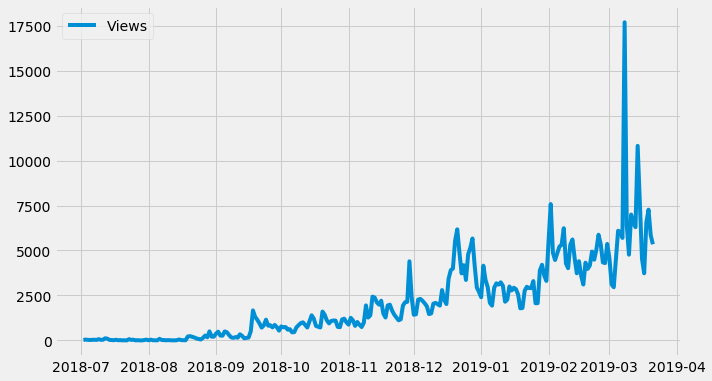

In [20]:
plt.figure(figsize=(10,6))
plt.plot(df.set_index('Date'))
plt.legend(['Views'])


In [0]:
## Removing the Outliers: Optional

In [22]:
"""df.loc[(df['Views'] > 10000), 'Views'] = np.nan
plt.figure(figsize=(10,6))
plt.plot(df.set_index('Date'))
plt.legend(['Views'])"""

"df.loc[(df['Views'] > 10000), 'Views'] = np.nan\nplt.figure(figsize=(10,6))\nplt.plot(df.set_index('Date'))\nplt.legend(['Views'])"

## Converting Views column to its log value

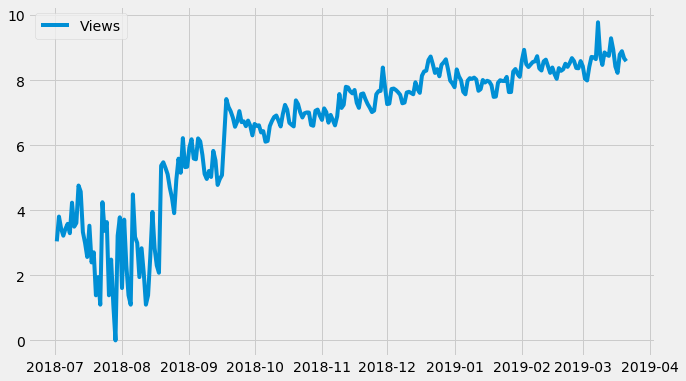

In [23]:
df['Views'] = np.log(df['Views'])
plt.figure(figsize=(10,6))
plt.plot(df.set_index('Date'))
plt.legend(['Views'])

## Making the dataset 'Prophet' compliant.

In [24]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2018-07-02,3.044522
1,2018-07-03,3.806662
2,2018-07-04,3.433987
3,2018-07-05,3.218876
4,2018-07-06,3.433987


## Making Predictions

Prophet follows the sklearn model API wherein an instance of the Prophet class is created and then the fit and predict methods are called. The model is instantiated by a new Prophet object and followed by calling its fit method and passing in the historical dataframe.

In [25]:
m1 = Prophet(daily_seasonality=True)
m1.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Prophet will by default fit weekly and yearly seasonalities if the time series is more than two cycles long. It will also fit daily seasonality for a sub-daily time series. You can add other seasonalities (monthly, quarterly, hourly)if required.

In [26]:
future1 = m1.make_future_dataframe(periods=60)
forecast1 = m1.predict(future1)
forecast1.tail().T

,318,319,320,321,322
ds,2019-05-16 00:00:00,2019-05-17 00:00:00,2019-05-18 00:00:00,2019-05-19 00:00:00,2019-05-20 00:00:00
trend,10.0387,10.0505,10.0622,10.0739,10.0856
yhat_lower,8.61868,8.56216,8.28525,8.19996,8.78318
yhat_upper,10.5,10.519,10.1985,10.0901,10.6853
trend_lower,9.76582,9.77164,9.77779,9.7815,9.7851
trend_upper,10.291,10.3089,10.3346,10.3516,10.3694
additive_terms,-0.454929,-0.492421,-0.810528,-0.869555,-0.331844
additive_terms_lower,-0.454929,-0.492421,-0.810528,-0.869555,-0.331844
additive_terms_upper,-0.454929,-0.492421,-0.810528,-0.869555,-0.331844
daily,-0.525892,-0.525892,-0.525892,-0.525892,-0.525892


In [27]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
318,2019-05-16,9.583806,8.618683,10.500000
319,2019-05-17,9.558042,8.562165,10.518953
320,2019-05-18,9.251662,8.285250,10.198479
321,2019-05-19,9.204363,8.199956,10.090053
322,2019-05-20,9.753801,8.783183,10.685345


Since we took the log of Views, let's convert back to original values 

In [28]:
np.exp(forecast1[['yhat', 'yhat_lower', 'yhat_upper']].tail())

,yhat,yhat_lower,yhat_upper
318,14527.608878,5534.091122,36315.486749
319,14158.095824,5229.990810,37010.372476
320,10421.877089,3964.957618,26862.297328
321,9940.400243,3640.791254,24102.078671
322,17219.560935,6523.608704,43710.562665


## Plotting the Forecast

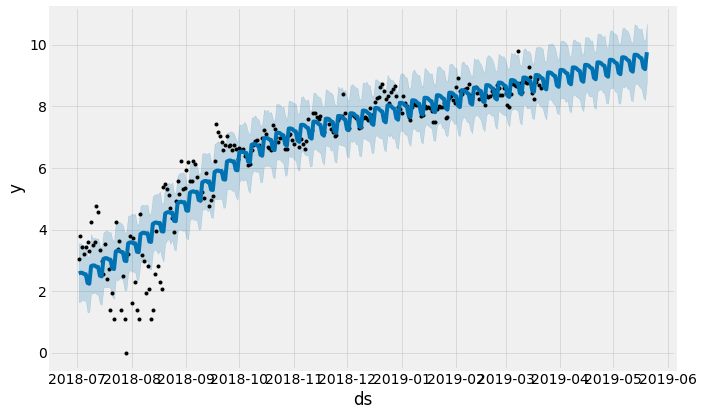

In [29]:
m1.plot(forecast1);

## Plotting the forecast components

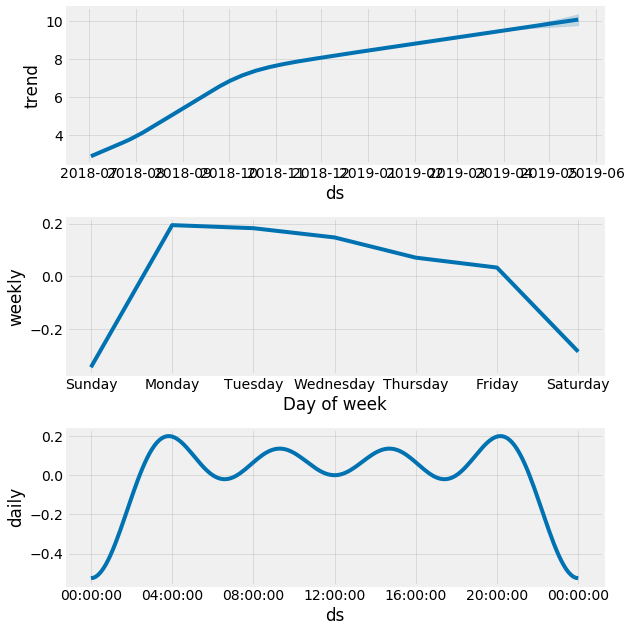

In [30]:
m1.plot_components(forecast1);

## Holiday Effect

In [31]:

articles = pd.DataFrame({
  'holiday': 'Article_Published',
  'ds': pd.to_datetime(['2018-07-02', '2018-07-06', '2018-07-08',
                        '2018-07-09', '2018-07-12', '2018-07-19', '2018-07-26', '2018-07-31',
                        '2018-08-06', '2018-08-15', '2018-07-19', '2018-08-26', '2018-08-31',
                        '2018-09-01', '2018-09-04', '2018-09-11', '2018-09-17', '2018-09-23',
                        '2018-10-02', '2018-10-09', '2018-10-18', '2018-10-19', '2018-10-26',
                        '2018-11-02', '2018-11-08', '2018-11-24', '2018-12-05', '2018-12-13',
                        '2018-12-19', '2018-12-24', '2018-12-27', '2019-01-08', '2019-01-11',
                        '2019-01-22', '2019-01-24', '2019-01-28', '2019-02-01', '2019-02-04',
                        '2019-02-07', '2019-02-12', '2019-02-15', '2019-02-21', '2019-03-03',
                        '2019-03-07', '2019-03-12', '2019-03-18', '2019-03-23' ]),
  'lower_window': 0,
  'upper_window': 5,
})
articles.head()

,holiday,ds,lower_window,upper_window
0,Article_Published,2018-07-02,0,5
1,Article_Published,2018-07-06,0,5
2,Article_Published,2018-07-08,0,5
3,Article_Published,2018-07-09,0,5
4,Article_Published,2018-07-12,0,5


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


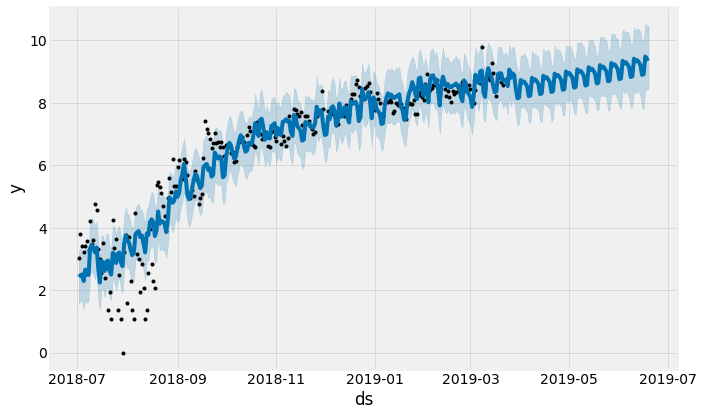

In [32]:
m2 = Prophet(holidays=articles,daily_seasonality=True).fit(df)
future2 = m2.make_future_dataframe(periods=90)
forecast2 = m2.predict(future2)
m2.plot(forecast2);

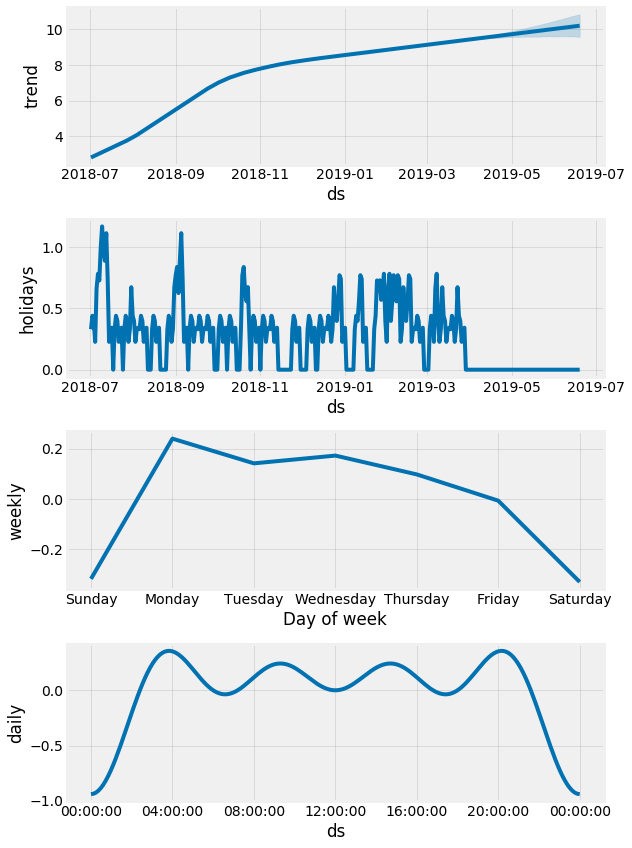

In [33]:
m2.plot_components(forecast2);

## Predicting Views for the next 15 days

In [34]:
m3 = Prophet(holidays=articles, mcmc_samples=300).fit(df)
future3 = m3.make_future_dataframe(periods=60)
forecast3 = m3.predict(future3)
forecast3["Views"] = np.exp(forecast3.yhat).round()
forecast3["Views_lower"] = np.exp(forecast3.yhat_lower).round()
forecast3["Views_upper"] = np.exp(forecast3.yhat_upper).round()
forecast3[(forecast3.ds > "3-22-2019") &
          (forecast3.ds < "4-07-2019")][["ds","Views_lower",
                                        "Views", "Views_upper"]]



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,Views_lower,Views,Views_upper
264,2019-03-23,2324.0,5814.0,15459.0
265,2019-03-24,1966.0,4777.0,11577.0
266,2019-03-25,3343.0,8028.0,20104.0
267,2019-03-26,2622.0,6141.0,14896.0
268,2019-03-27,2933.0,7078.0,18632.0
269,2019-03-28,2695.0,6661.0,15820.0
270,2019-03-29,1811.0,4336.0,10362.0
271,2019-03-30,1269.0,3150.0,7995.0
272,2019-03-31,1244.0,3237.0,8095.0
273,2019-04-01,2413.0,5667.0,13555.0


## Exporting the results to Excel

In [0]:
forecast3.to_excel('Predicted_Views.xlsx')